In [8]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import gmplot as gmplot
from xml.etree import ElementTree

In [9]:
#importing cleaned data

data_clean = pd.read_csv("./Resources/final_house_data_with_nearest_station")
data_clean = data_clean.drop(columns='Unnamed: 0')
data_clean["price"] = data_clean["price"] 
data_clean.head()

,zpid,latitude,longitude,usecode,bathrooms,bedrooms,zipcode,price,lotSizeSqFt,Nearest Station Index,Nearest Station Lat,Nearest Station Lon,distance_miles
0,31947881,40.780026,-73.916672,SingleFamily,1.0,3,11105,1297999,2500,0,40.775036,-73.912034,0.421744
1,94721614,40.770830,-73.903180,MultiFamily2To4,1.0,1,11105,543865,0,0,40.775036,-73.912034,0.547056
2,31947885,40.779837,-73.916406,SingleFamily,1.0,3,11105,1402414,2500,0,40.775036,-73.912034,0.403068
3,31943243,40.768852,-73.900892,Triplex,0.0,0,11105,1290066,2200,0,40.775036,-73.912034,0.723042
4,31943244,40.768754,-73.900791,Duplex,0.0,0,11105,1150027,2180,0,40.775036,-73.912034,0.731314


# Plotting Station Data in Google Maps
Using this to show the distribution of the stops

In [10]:
gkey = "Insert Key Here"


station_data = pd.read_csv("./Resources/mta_station.csv")
station_location = station_data[["GTFS Latitude","GTFS Longitude"]]

lat = station_data["GTFS Latitude"]
lat_center = station_data["GTFS Latitude"].mean()
long = station_data["GTFS Longitude"]
long_center= station_data["GTFS Longitude"].mean()



In [11]:
# gmap = gmplot.GoogleMapPlotter.from_geocode("New York City")
gmap = gmplot.GoogleMapPlotter(lat_center, long_center,zoom = 12.5,apikey =gkey)
gmap.scatter(lat,long,'red',size = 50, marker= False)

gmap.draw('station_locations.html')
#heatmap of station locations - using this for slides


# Station Data Charts

In [38]:
station_data.head(4)

,Unnamed: 0,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508


In [80]:
#Counting Number of Stations per Borough

borough_mta = station_data[["Borough","Division"]]
station_count =  station_data.groupby(["Borough"])["Borough"].count()

borough_mta.head(3)


#test_y = d["SingleFamily"].groupby('bedrooms')['price'].mean()

x = borough_mta["Borough"].unique()
y = station_count

x

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

In [77]:
station_count

Borough
Bk    169
Bx     70
M     153
Q      84
SI     21
Name: Borough, dtype: int64

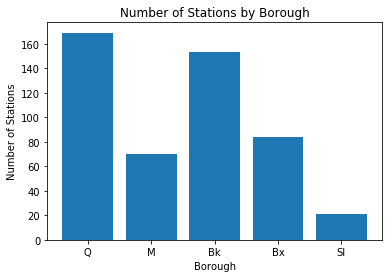

In [84]:
#bar
plt.bar(x,y)
plt.title("Number of Stations by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Stations")

plt.savefig("Number_of_Stations.png")

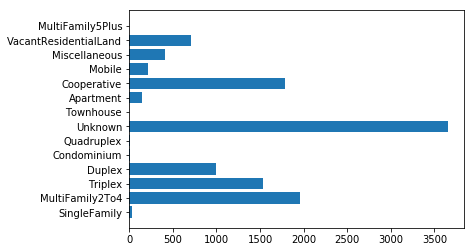

In [96]:
#bar by home types
x_home = data_clean["usecode"].unique()
home_count = data_clean.groupby(["usecode"])["usecode"].count()
y_home = home_count

plt.barh(x_home,y_home)

plt.savefig("Number_of_homes_by_type.png")

In [12]:
data_clean.describe()

,zpid,latitude,longitude,bathrooms,bedrooms,price,lotSizeSqFt,Nearest Station Index,Nearest Station Lat,Nearest Station Lon,distance_miles
count,1.146900e+04,11469.000000,11469.000000,11469.000000,11469.000000,1.146900e+04,1.146900e+04,11469.000000,11469.000000,11469.000000,11469.000000
mean,7.341888e+08,40.721114,-73.958060,0.957865,1.333856,1.243804e+06,1.481034e+04,246.656465,40.720353,-73.956671,0.420944
std,9.548626e+08,0.084419,0.074644,1.243533,2.004457,1.996663e+06,8.197169e+05,145.804471,0.081259,0.071988,1.112882
min,1.367598e+07,40.419521,-74.254145,0.000000,0.000000,4.069900e+04,0.000000e+00,0.000000,40.512764,-74.251961,0.000125
25%,3.193448e+07,40.671898,-73.993074,0.000000,0.000000,5.241150e+05,0.000000e+00,120.000000,40.670847,-73.991057,0.098782
50%,8.000494e+07,40.719354,-73.962246,1.000000,0.000000,7.710340e+05,9.510000e+02,250.000000,40.718331,-73.961454,0.180047
75%,2.091969e+09,40.771257,-73.918209,1.000000,2.000000,1.297999e+06,2.684000e+03,360.000000,40.768296,-73.918425,0.309046
max,2.146985e+09,41.003982,-73.686222,26.000000,50.000000,4.490283e+07,8.759916e+07,496.000000,40.903125,-73.761353,12.493687


In [13]:
data_clean.dtypes

zpid                       int64
latitude                 float64
longitude                float64
usecode                   object
bathrooms                float64
bedrooms                   int64
zipcode                   object
price                      int64
lotSizeSqFt                int64
Nearest Station Index      int64
Nearest Station Lat      float64
Nearest Station Lon      float64
distance_miles           float64
dtype: object

# Creating different data sets to run correlations by Home Type

In [14]:
# house_type_data = data_clean.groupby(["usecode"])[["price","distance_miles"]].mean()
# house_type_data

## Exploritory Data Checking

In [15]:
data_clean["lotSizeSqFt"].describe()

#Issue Here - some houses have Zero as Square Feet - these will be removed


count    1.146900e+04
mean     1.481034e+04
std      8.197169e+05
min      0.000000e+00
25%      0.000000e+00
50%      9.510000e+02
75%      2.684000e+03
max      8.759916e+07
Name: lotSizeSqFt, dtype: float64

In [16]:
#Create a list of home types - This will be used for a loop later
hometypes = data_clean["usecode"].unique()
hometypes

array(['SingleFamily', 'MultiFamily2To4', 'Triplex', 'Duplex',
       'Condominium', 'Quadruplex', 'Unknown', 'Townhouse', 'Apartment',
       'Cooperative', 'Mobile', 'Miscellaneous', 'VacantResidentialLand',
       'MultiFamily5Plus'], dtype=object)

In [17]:
data_clean.head(1)

,zpid,latitude,longitude,usecode,bathrooms,bedrooms,zipcode,price,lotSizeSqFt,Nearest Station Index,Nearest Station Lat,Nearest Station Lon,distance_miles
0,31947881,40.780026,-73.916672,SingleFamily,1.0,3,11105,1297999,2500,0,40.775036,-73.912034,0.421744


# Creating a loop in order to create new data frames with filtered data


In [18]:
corr_data_raw = data_clean[['usecode','price','bathrooms','bedrooms','distance_miles']]
corr_data_raw

#hometypes = an array of the home types
#can for loops create variables based on the name set
d = {}
for types in hometypes:
    d[types] = corr_data_raw[corr_data_raw['usecode'].str.contains(types)]



In [19]:
singlefam_corr = d["SingleFamily"].corr()
singlefam_corr

d["SingleFamily"].describe()

,price,bathrooms,bedrooms,distance_miles
count,1.791000e+03,1791.000000,1791.000000,1791.000000
mean,1.074267e+06,1.094919,1.690676,1.143448
std,1.358032e+06,1.354717,1.990850,2.247109
min,7.904300e+04,0.000000,0.000000,0.010636
25%,5.087205e+05,0.000000,0.000000,0.169824
50%,7.205110e+05,1.000000,1.000000,0.321999
75%,1.191886e+06,2.000000,3.000000,0.709498
max,2.079976e+07,10.000000,18.000000,11.938495


In [36]:
d["SingleFamily"].head(4)

,usecode,price,bathrooms,bedrooms,distance_miles
0,SingleFamily,1297999,1.0,3,0.421744
2,SingleFamily,1402414,1.0,3,0.403068
10,SingleFamily,871200,1.0,2,0.664712
14,SingleFamily,983718,3.0,4,0.675654


<BarContainer object of 14 artists>

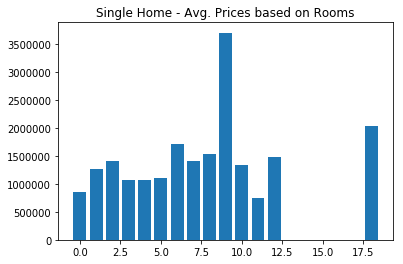

In [37]:
x = d["SingleFamily"]['bedrooms'].unique()
y = d["SingleFamily"]['price'].sum()


test_y = d["SingleFamily"].groupby('bedrooms')['price'].mean()
test_data = d["SingleFamily"].groupby('bedrooms').mean()


room_bar = plt.bar(x,test_y)
plt.title('Single Home - Avg. Prices based on Rooms')
room_bar

In [31]:
#Binning



0         3
2         3
10        2
14        4
21        2
24        3
34        2
61        2
75        0
82        2
113       2
114       4
115       3
116       3
128       0
129       2
130       3
131       3
132       0
133       5
134       3
135       4
136       0
137       0
138       0
139       0
140       0
141       0
142       3
143       0
         ..
11342     0
11343     0
11344     0
11354     5
11360    11
11361     0
11363     0
11384     4
11386     3
11388     4
11391     3
11397     0
11447     3
11449     3
11450     6
11452     4
11454     0
11455     4
11456     4
11457     4
11458     0
11460     4
11461     3
11462     3
11463     5
11464     3
11465     0
11466     5
11467     5
11468     2
Name: bedrooms, Length: 1791, dtype: int64

In [21]:
#

#'SingleFamily', 'MultiFamily2To4', 'Triplex', 'Duplex',
#       'Condominium', 'Quadruplex', 'Unknown', 'Townhouse', 'Apartment',
#       'Cooperative', 'Mobile', 'Miscellaneous', 'VacantResidentialLand',
#       'MultiFamily5Plus'

single_family_corr = corr_data_raw[corr_data_raw['usecode'].str.contains('SingleFamily')]
multifamily_corr = corr_data_raw[corr_data_raw['usecode'].str.contains('MultiFamily2To4')]
triplex_corr = corr_data_raw[corr_data_raw['usecode'].str.contains('Triplex')]
duplex_corr = corr_data_raw[corr_data_raw['usecode'].str.contains('Duplex')]
condo_corr = corr_data_raw[corr_data_raw['usecode'].str.contains('Condominium')]
mobile_corr = corr_data_raw[corr_data_raw['usecode'].str.contains('Mobile')]
townhouse_corr = corr_data_raw[corr_data_raw['usecode'].str.contains('Townhouse')]


In [25]:
single_family_corr

,usecode,price,bathrooms,bedrooms,distance_miles
0,SingleFamily,1297999,1.0,3,0.421744
2,SingleFamily,1402414,1.0,3,0.403068
10,SingleFamily,871200,1.0,2,0.664712
14,SingleFamily,983718,3.0,4,0.675654
21,SingleFamily,843495,1.0,2,0.692865
24,SingleFamily,880436,2.0,3,0.499202
34,SingleFamily,1535737,1.0,2,0.566608
61,SingleFamily,1184235,1.0,2,0.196314
75,SingleFamily,517827,1.0,0,0.126064
82,SingleFamily,1689363,2.0,2,0.136835


In [24]:
single_family_corr.corr()

,price,bathrooms,bedrooms,distance_miles
price,1.000000,0.113863,0.045818,-0.195595
bathrooms,0.113863,1.000000,0.821941,0.024515
bedrooms,0.045818,0.821941,1.000000,0.058529
distance_miles,-0.195595,0.024515,0.058529,1.000000


In [26]:
multifamily_corr.corr()

,price,bathrooms,bedrooms,distance_miles
price,1.000000,0.385310,0.229361,-0.091900
bathrooms,0.385310,1.000000,0.709075,0.081437
bedrooms,0.229361,0.709075,1.000000,0.079143
distance_miles,-0.091900,0.081437,0.079143,1.000000


In [28]:
condo_corr.corr()

,price,bathrooms,bedrooms,distance_miles
price,1.000000,0.261260,0.174516,-0.122571
bathrooms,0.261260,1.000000,0.871700,-0.016852
bedrooms,0.174516,0.871700,1.000000,0.029436
distance_miles,-0.122571,-0.016852,0.029436,1.000000


In [ ]:
for types in hometypes:
    d["data_{types}"] = corr_data_raw.filter(items = types)
    print(d["data_{types}"])

In [ ]:
#creating the correlation dataset
#dependent variable - house prices
#independet variable - distance to station - home size
#need to group data by rooms in order to run correlations - or create groupings

corr_sampledata = data_clean(
corr_sampledata